C:\Users\Niriksha Manoj\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [13/May/2023 11:08:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/May/2023 11:08:23] "GET /static/css/bootstrap.css HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:23] "GET /static/css/style.css HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:23] "GET /static/css/responsive.css HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:23] "GET /static/js/jquery-3.4.1.min.js HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:23] "GET /static/js/bootstrap.js HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:23] "GET /static/js/custom.js HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:23] "GET /static/images/slider-img.png HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/May/2023 11:08:23] "GET /static/images/hero-bg.png HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:23] "GET /static/images/left-angle.png HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:23] "GET /static/images/right-

images (3).jpeg
hi
Make
a
handnriting
fontl


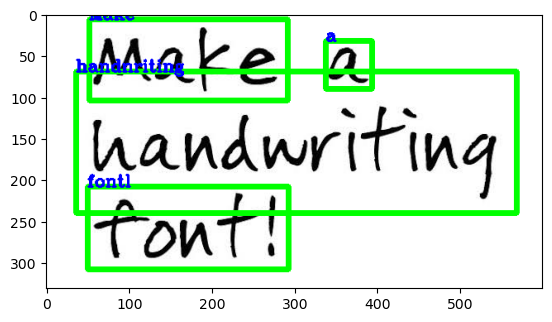

127.0.0.1 - - [13/May/2023 11:08:50] "POST /success HTTP/1.1" 200 -
127.0.0.1 - - [13/May/2023 11:08:50] "GET /static/css/bootstrap.css HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:50] "GET /static/css/style.css HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:50] "GET /static/css/responsive.css HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:50] "GET /static/js/jquery-3.4.1.min.js HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:50] "GET /static/js/bootstrap.js HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:50] "GET /static/js/custom.js HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:50] "GET /static/images/about-img2.png HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 11:08:50] "GET /success HTTP/1.1" 405 -


-------------------------------------
 Make a handnriting fontl
-----------------------------------


In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np
# converts the text to speech
import pyttsx3

#translates into the mentioned language
from googletrans import Translator

# read image
from flask import Flask,render_template,request
answer='asdf'
text_org=""
text=""
file_name=""
app=Flask(__name__)
@app.route('/')
@app.route("/index")
def index():
    return render_template('index.html')

@app.route('/about')
def about():
    
    return render_template('about.html')

@app.route('/success', methods = ['POST'])
def success():
    
     if request.method == 'POST':
        f = request.files['file']
        global file_name
        file_name=f.filename
       
        f.save(r"C:\Users\Niriksha Manoj\Music\image\image/"+str(file_name))
        print(file_name)
        print("hi")
        image_to_text()
        return render_template("1.html",name=answer)
        

def image_to_text():
    
    path_1=r"C:\Users\Niriksha Manoj\Music\image\image/"+file_name
    global text_org
    text_org=""
    image_path = path_1

    img = cv2.imread(image_path)

    # instance text detector
    reader = easyocr.Reader(['en'], gpu=False)

    # detect text on image
    text_ = reader.readtext(img)


    threshold = 0.25
    # draw bbox and text
    for t_, t in enumerate(text_):
       # print(t)

        bbox, text, score = t

        if score > threshold:
            cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 5)
            cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2)
        
        print(text)
       
        text_org=text_org+" "+text
        
        
    
    global answer
    answer=text_org
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()  
    print("-------------------------------------")
    
    print(answer)
    print("-----------------------------------")
    
    
if __name__=='__main__':
    app.run()


